In [78]:
import zipfile
import os
print("Contents of /content/:")
!ls -l /content/

zip_file_path = "/content/creditcard.csv.zip"  # Update path if needed
if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall("/content/") # Extracts all the contents into the current directory
        print(f"'{zip_file_path}' unzipped successfully to '/content/'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file. Please check if the file is corrupted or not a zip file.")
else:
    print(f"Error: Zip file not found at '{zip_file_path}'. Please ensure the file is uploaded and the path is correct.")

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("/content/creditcard.csv")   # change path if needed
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [65]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [66]:
# Fill numerical columns (excluding 'Class') with their mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if col != 'Class':
        df[col] = df[col].fillna(df[col].mean())

# For the 'Class' column, fill NaN with 0 and convert to integer
if 'Class' in df.columns:
    df['Class'] = df['Class'].fillna(0).astype(int)

In [67]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Scaling (Standardization)

In [70]:
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train_scaled)
X_test_norm = normalizer.transform(X_test_scaled)

In [71]:
sm = SMOTE(random_state=42) # smote
X_train_sm, y_train_sm = sm.fit_resample(X_train_norm, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_sm))

Before SMOTE: [9525   42]
After SMOTE: [9525 9525]


In [72]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.transform(X_test_norm)

print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.26008961 0.10122968]


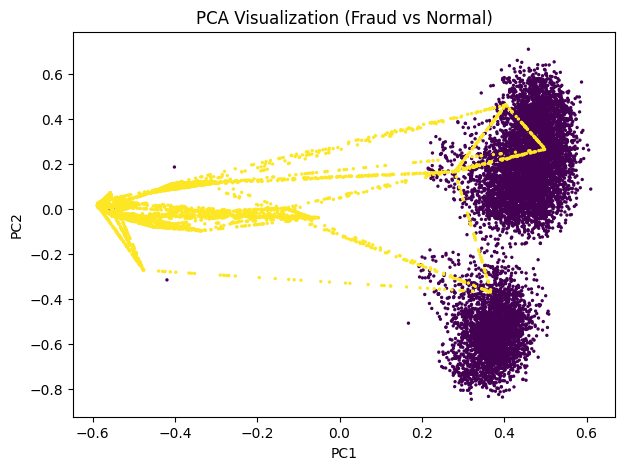

In [73]:
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_sm, s=2)
plt.title("PCA Visualization (Fraud vs Normal)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [74]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_pca, y_train_sm)

RandomForestClassifier(n_estimators=200, random_state=42)

In [75]:
y_pred = model.predict(X_test_pca)

In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9899665551839465

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2382
           1       0.28      0.90      0.43        10

    accuracy                           0.99      2392
   macro avg       0.64      0.95      0.71      2392
weighted avg       1.00      0.99      0.99      2392

